In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

In [243]:
df = pd.read_csv(r"C:\Users\Global Tech\Downloads\archive (3)\Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [244]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [245]:
df.shape

(10000, 12)

In [246]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [247]:
df.describe()



,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [249]:
df.duplicated().unique()

array([False])

In [250]:

# Count unique values for categorical features
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [251]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

C:\Users\Global Tech\AppData\Local\Temp\ipykernel_8632\424507135.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='coolwarm')


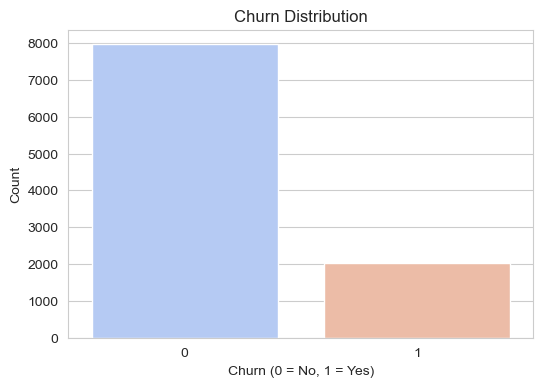

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Churn count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [253]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

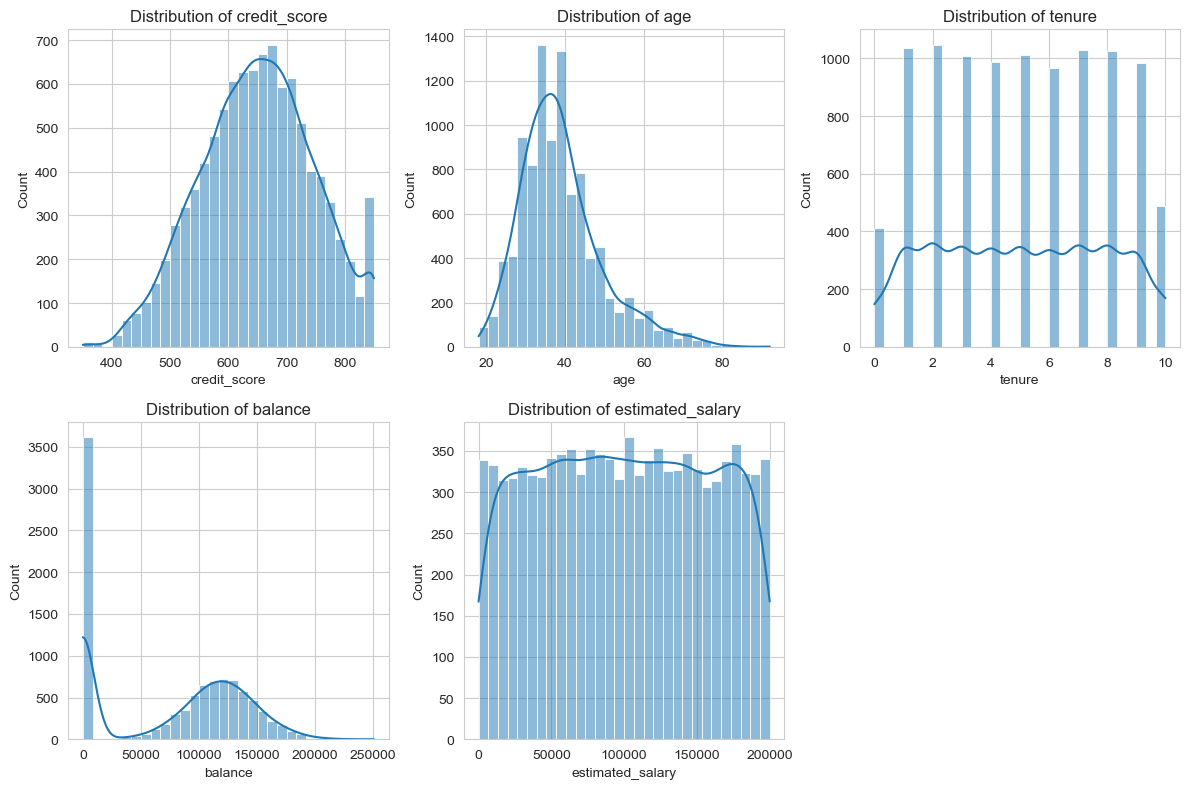

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = ["credit_score", "age", "tenure", "balance", "estimated_salary"]

# Plot histograms with KDE
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=(True))
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


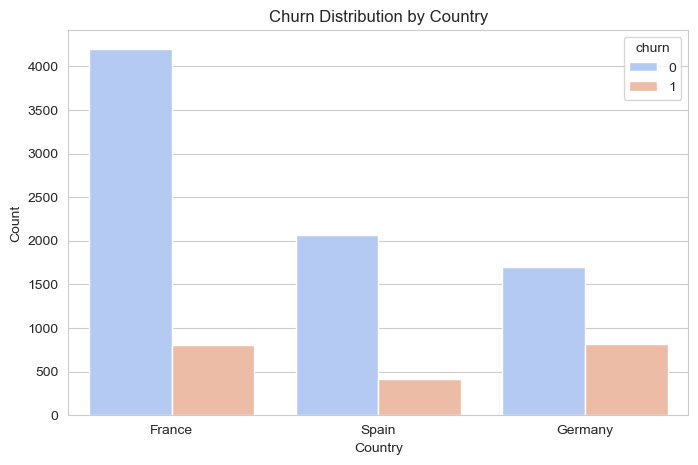

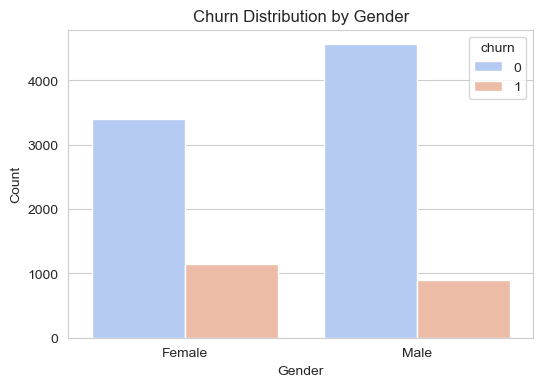

In [255]:
# Churn by country
plt.figure(figsize=(8, 5))
sns.countplot(x="country", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

# Churn by gender
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


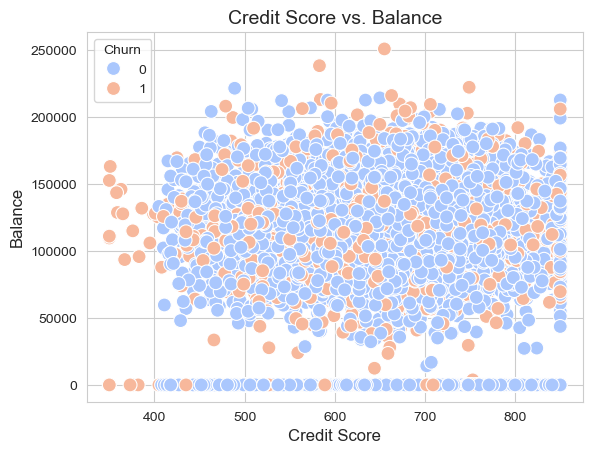

In [256]:
# Plotting the scatter plot for Credit Score vs. Balance
plt.figure()
sns.scatterplot(data=df, x='credit_score', y='balance', hue='churn', palette='coolwarm', s=100)
plt.title('Credit Score vs. Balance', fontsize=14)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.legend(title='Churn')
plt.show()

C:\Users\Global Tech\AppData\Local\Temp\ipykernel_8632\3679070926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='products_number', y='churn', data=churn_rate_by_products, palette='pastel')


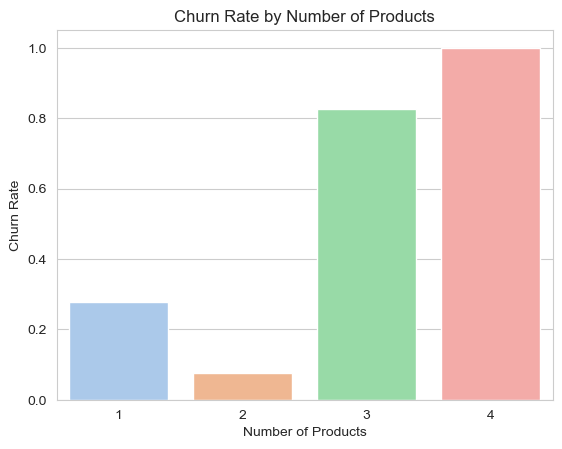

In [257]:
churn_rate_by_products = df.groupby('products_number')['churn'].mean().reset_index()

# Create the bar plot
plt.figure()
sns.barplot(x='products_number', y='churn', data=churn_rate_by_products, palette='pastel')

# Set plot labels and title
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Products')

# Show the plot
plt.show()

C:\Users\Global Tech\AppData\Local\Temp\ipykernel_8632\3404995982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='active_member', y='churn', data=churn_rate,palette='pastel')


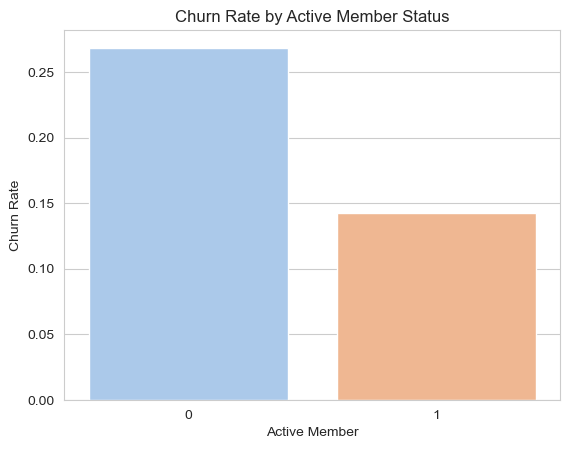

In [258]:
churn_rate = df.groupby('active_member')['churn'].mean().reset_index()

# Create a bar plot using seaborn
sns.barplot(x='active_member', y='churn', data=churn_rate,palette='pastel')
plt.xlabel('Active Member')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Active Member Status')
plt.show()


C:\Users\Global Tech\AppData\Local\Temp\ipykernel_8632\2036372685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='age', data=df, palette='pastel')


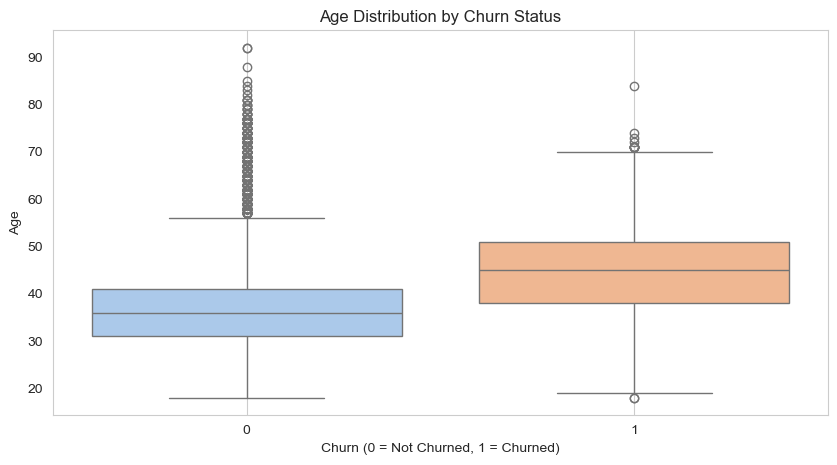

In [259]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='age', data=df, palette='pastel')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Age')
plt.grid()
plt.show()

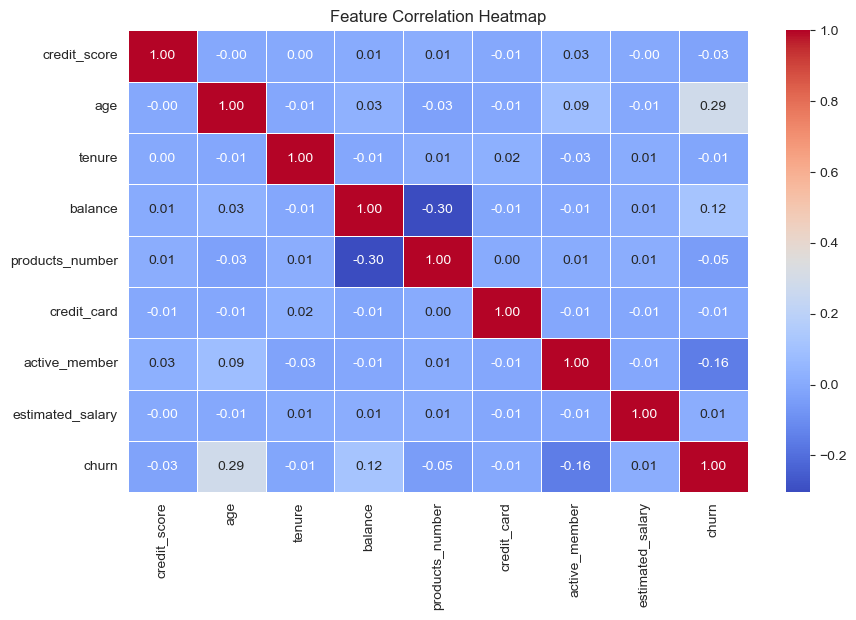

In [260]:
# Compute correlation matrix
corr_matrix = df[[ 'credit_score', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [261]:
df1 = df.copy()

In [262]:
df1.drop("customer_id", axis=1)
df1.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [263]:
label_encoder = LabelEncoder()
df1['country'] = label_encoder.fit_transform(df1['country'])
df1['gender'] = label_encoder.fit_transform(df1['gender'])

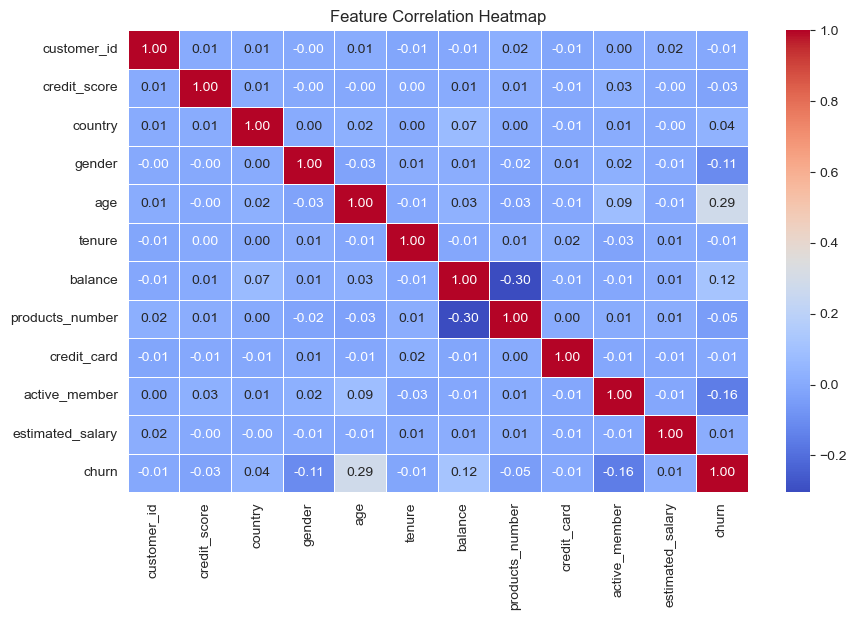

In [264]:
# Compute correlation matrix
corr_matrix = df1.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## feauture engineering 

In [265]:
df1['Balance_Age_Ratio'] = df1['balance'] / (df1['age'] + 1)


In [266]:
df1['Salary_Balance_Ratio'] = df1['estimated_salary'] / (df1['balance'] + 1)


In [267]:
df1.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Balance_Age_Ratio,Salary_Balance_Ratio
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880000
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1995.425238,1.342848
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3713.041860,0.713581
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000,93826.630000
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2852.518636,0.630093


In [268]:
df1['Has_Balance'] = (df1['balance'] > 0).astype(int)


In [269]:
df1['Tenure_Age_Ratio'] = df1['tenure'] / (df1['age'] + 1)


In [270]:
df1['Low_Tenure_Low_Balance'] = ((df1['tenure'] < 3) & (df1['balance'] < 50000)).astype(int)


In [271]:
bins = [300, 600, 750, 900]  
labels = ['Low', 'Medium', 'High']  
df1['Credit_Score_Category'] = pd.cut(df1['credit_score'], bins=bins, labels=labels)


In [272]:
df1['Debt_Salary_Ratio'] = df1['credit_score'] / (df1['estimated_salary'] + 1)


In [273]:
df1['Age_Credit_Interaction'] = df1['age'] * df1['credit_score']


In [274]:
df1['Tenure_Balance_Interaction'] = df1['tenure'] * df1['balance']


In [275]:
label_encoder = LabelEncoder()
df1['Credit_Score_Category'] = label_encoder.fit_transform(df1['Credit_Score_Category'])

In [276]:
df2= df1.copy()

In [277]:
df2.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'Balance_Age_Ratio',
       'Salary_Balance_Ratio', 'Has_Balance', 'Tenure_Age_Ratio',
       'Low_Tenure_Low_Balance', 'Credit_Score_Category', 'Debt_Salary_Ratio',
       'Age_Credit_Interaction', 'Tenure_Balance_Interaction'],
      dtype='object')

In [278]:
df2 = df2.drop(['customer_id', 'credit_score', 'country', 'tenure'
       , 'products_number', 'credit_card', 'estimated_salary'], axis=1)

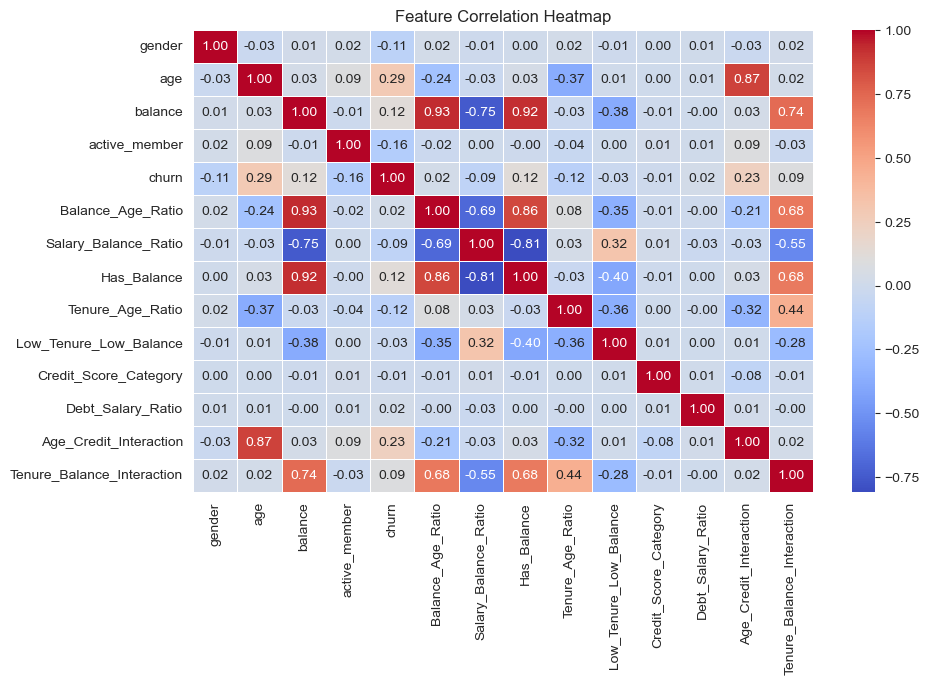

In [279]:
# Compute correlation matrix
corr_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [280]:
# nous remarquons que le feature engineering navait aucune amolioration

In [281]:
df2.columns

Index(['gender', 'age', 'balance', 'active_member', 'churn',
       'Balance_Age_Ratio', 'Salary_Balance_Ratio', 'Has_Balance',
       'Tenure_Age_Ratio', 'Low_Tenure_Low_Balance', 'Credit_Score_Category',
       'Debt_Salary_Ratio', 'Age_Credit_Interaction',
       'Tenure_Balance_Interaction'],
      dtype='object')

In [282]:
df3= df.copy()

In [283]:
df3.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [284]:
label_encoder = LabelEncoder()
df3['country'] = label_encoder.fit_transform(df3['country'])
df3['gender'] = label_encoder.fit_transform(df3['gender'])

## building model

In [285]:
X = df3.drop('churn', axis=1)
y = df3['churn']

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (8000, 11)
y_train shape: (8000,)
X_test shape: (2000, 11)
y_test shape: (2000,)


In [288]:
# standariser les donnees

In [289]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [290]:
X_train

array([[-1.24645641,  0.35649971, -0.9055496 , ...,  0.64920267,
         0.97481699,  1.36766974],
       [ 1.05381124, -0.20389777,  0.30164867, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [ 0.3664786 , -0.96147213,  1.50884694, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [-1.6259648 ,  0.86500853, -0.9055496 , ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 1.62852321,  0.15932282, -0.9055496 , ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.21718071,  0.47065475,  0.30164867, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [291]:
list_results =[]

## model comparision

In [292]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.show()

In [293]:
# reg logistic

In [294]:
from sklearn.linear_model import LogisticRegression
LinReg= LogisticRegression()

In [295]:
# Train the model
LinReg.fit(X_train, y_train)
# Make predictions
y_pred_LR = LinReg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LR)
list_results.append(accuracy)

Accuracy: 0.8155
Precision: 0.6016949152542372
Recall: 0.1806615776081425
Sensitivity: 0.1806615776081425
Specificity: 0.9707529558182949
ROC AUC: 0.5757072667132187


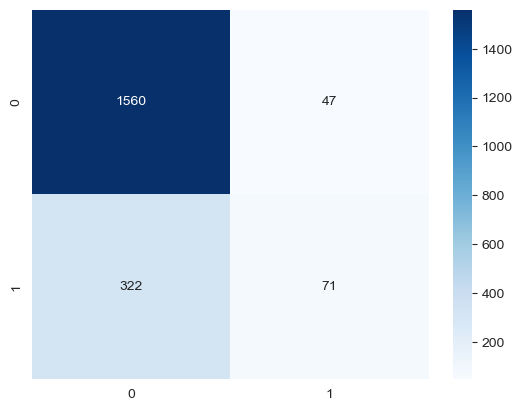

In [296]:
evaluate_model(y_test,y_pred_LR)

In [297]:
# random forest

In [298]:
from sklearn.ensemble import RandomForestClassifier
Randfor = RandomForestClassifier(n_estimators=100, random_state=42)

Accuracy: 0.8665
Precision: 0.7669491525423728
Recall: 0.46055979643765904
Sensitivity: 0.46055979643765904
Specificity: 0.9657747355320473
ROC AUC: 0.7131672659848532


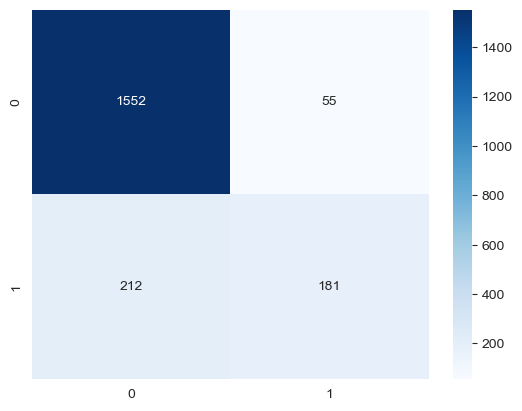

In [299]:
# Train the model
Randfor.fit(X_train, y_train)
# Make predictions
y_pred_rf = Randfor.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
list_results.append(accuracy)
evaluate_model(y_test,y_pred_rf)

In [300]:

from sklearn.tree import DecisionTreeClassifier
deciTree = DecisionTreeClassifier(random_state=42)
# Train the model
deciTree.fit(X_train, y_train)
# Make predictions
y_pred_dt = deciTree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
list_results.append(accuracy)

Accuracy: 0.7845
Precision: 0.4575892857142857
Recall: 0.5216284987277354
Sensitivity: 0.5216284987277354
Specificity: 0.8487865588052271
ROC AUC: 0.6852075287664813


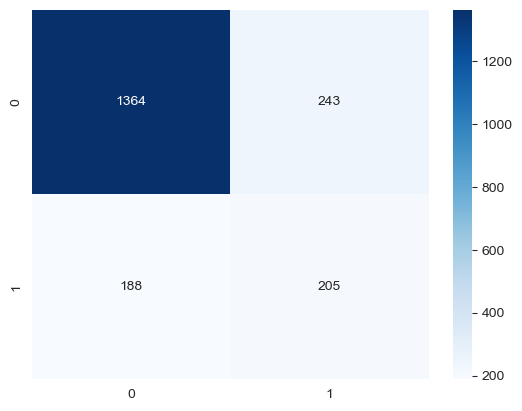

In [301]:
evaluate_model(y_test,y_pred_dt)

In [302]:
list_results=np.array(list_results)
result=list_results.reshape(3,1)
columns=['Accuracy']
index=['Logistic Regression','Random Forest', 'Decision Tree']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result

,Accuracy
Logistic Regression,0.8155
Random Forest,0.8665
Decision Tree,0.7845
